# Machine Learning Exercises for Curve Fitting

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(73)

In [3]:
def f_linear(x):
    noise = np.random.normal(0, 0.1, x.shape)
    return x + noise

In [36]:
x_linear = np.linspace(0, 1, 50)
y_linear = f_linear(x_linear)

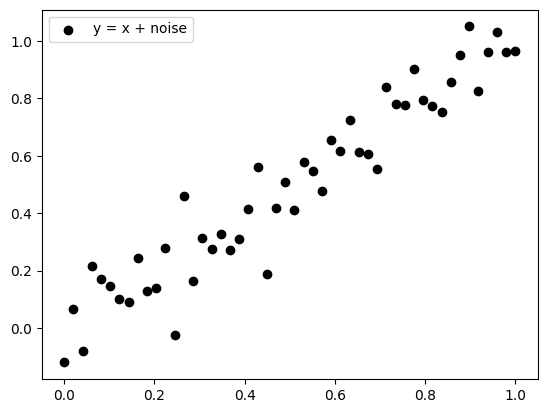

In [37]:
plt.scatter(x_linear, y_linear, label='y = x + noise', c='k')
plt.legend()

## Linear regression from scratch

### Deriving least square formula

#### Model

$f(x) = mx_i + b = \hat{y}$

$m$: slope \
$b$: intercept

#### Loss function

$L_i = y_i - \hat{y_i} = y_i - (mx_i + b)$   : error for each sample

$L$ = $\sum L_i^2 = \sum (y_i - (mx_i + b))^2$ : sum of squared errors

#### Minimizing loss (error) function

$\frac{\partial L}{\partial m} = 0$

$\frac{\partial L}{\partial b} = 0$

$m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$

$b = \bar{y} - m\bar{x}$

$\bar{x}$: mean of x \
$\bar{y}$: mean of y

#### R-squared

A score that indicates how well the model fits the data

$R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}$

In [7]:
def fit_linear_scratch(x, y):
    """
    Fit a linear model y = ax + b by minimizing the sum of squared errors.
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = x - x_mean
    y_diff = y - y_mean
    m = np.sum(x_diff * y_diff) / np.sum(x_diff ** 2)
    b = y_mean - m * x_mean
    u = np.sum((y - (m * x + b)) ** 2)
    v = np.sum((y - y_mean) ** 2)
    R_squared = 1 - u / v
    return m, b, R_squared

In [8]:
m, b, R_squared = fit_linear_scratch(x_linear, y_linear)
m, b, R_squared = np.round(m, 4), np.round(b, 4), np.round(R_squared, 4)
print('m:', m)
print('b:', b)
print('R-squared:', R_squared)

m: 0.9711
b: 0.0207
R-squared: 0.8806


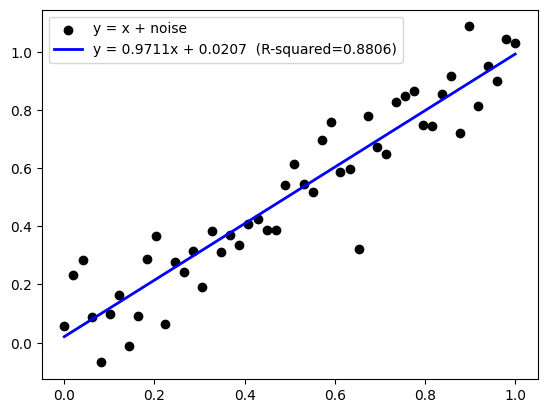

In [9]:
plt.scatter(x_linear, y_linear, label='y = x + noise', c='k')
plt.plot(x_linear, m * x_linear + b, label=f'y = {m}x + {b}  (R-squared={R_squared})', c='b', lw=2)
plt.legend()

## Scikit-learn

### Linear regression

In [10]:
from sklearn.linear_model import LinearRegression

In [38]:
x_linear_reshaped = x_linear.reshape(-1, 1)

In [39]:
model1 = LinearRegression()
estimator1 = model1.fit(x_linear_reshaped, y_linear)
R_squared1 = estimator1.score(x_linear_reshaped, y_linear)
m1, b1 = estimator1.coef_[0], estimator1.intercept_
m1, b1, R_squared1 = np.round(m1, 4), np.round(b1, 4), np.round(R_squared1, 4)
print('m1:', m1)
print('b1:', b1)
print('R-squared1:', R_squared1)

m1: 1.0326
b1: -0.025
R-squared1: 0.9106


### Lasso

In [14]:
from sklearn.linear_model import Lasso

In [16]:
model2 = Lasso(alpha=0.01)
estimator2 = model2.fit(x_linear_reshaped, y_linear)
R_squared2 = estimator2.score(x_linear_reshaped, y_linear)
m2, b2 = estimator2.coef_[0], estimator2.intercept_
m2, b2, R_squared2 = np.round(m2, 4), np.round(b2, 4), np.round(R_squared2, 4)
print('m2:', m2)
print('b2:', b2)
print('R-squared2:', R_squared2)

m2: 0.8558
b2: 0.0784
R-squared2: 0.8682


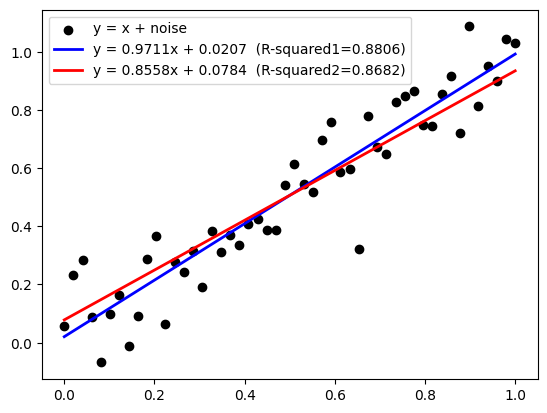

In [17]:
plt.scatter(x_linear, y_linear, label='y = x + noise', c='k')
plt.plot(x_linear, m1 * x_linear + b1, label=f'y = {m1}x + {b1}  (R-squared1={R_squared1})', c='b', lw=2)
plt.plot(x_linear, m2 * x_linear + b2, label=f'y = {m2}x + {b2}  (R-squared2={R_squared2})', c='r', lw=2)
plt.legend()

### Ridge

In [18]:
from sklearn.linear_model import Ridge

In [20]:
model3 = Ridge()
estimator3 = model3.fit(x_linear_reshaped, y_linear)
R_squared3 = estimator3.score(x_linear_reshaped, y_linear)
m3, b3 = estimator3.coef_[0], estimator3.intercept_
m3, b3, R_squared3 = np.round(m3, 4), np.round(b3, 4), np.round(R_squared3, 4)
print('m3:', m3)
print('b3:', b3)
print('R-squared3:', R_squared3)

m3: 0.7891
b3: 0.1117
R-squared3: 0.8497


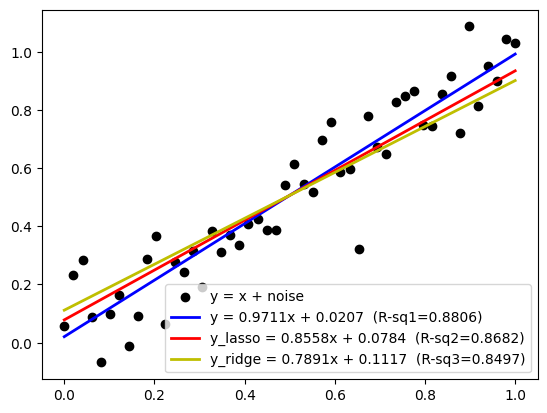

In [21]:
plt.scatter(x_linear, y_linear, label='y = x + noise', c='k')
plt.plot(x_linear, m1 * x_linear + b1, label=f'y = {m1}x + {b1}  (R-sq1={R_squared1})', c='b', lw=2)
plt.plot(x_linear, m2 * x_linear + b2, label=f'y_lasso = {m2}x + {b2}  (R-sq2={R_squared2})', c='r', lw=2)
plt.plot(x_linear, m3 * x_linear + b3, label=f'y_ridge = {m3}x + {b3}  (R-sq3={R_squared3})', c='y', lw=2)
plt.legend()

## Non-linear regression

In [22]:
def f_polynomial(x):
    noise = np.random.normal(0, 0.1, x.shape)
    return x ** 2 + 2 * x + 1 + noise

In [40]:
x_polynomial = np.linspace(-3, 1, 50)
y_polynomial = f_polynomial(x_polynomial)

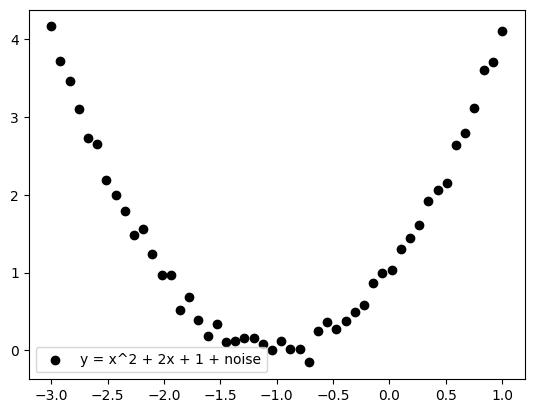

In [41]:
plt.scatter(x_polynomial, y_polynomial, label='y = x^2 + 2x + 1 + noise', c='k')
plt.legend()

### Unsuitable model for non-linear data

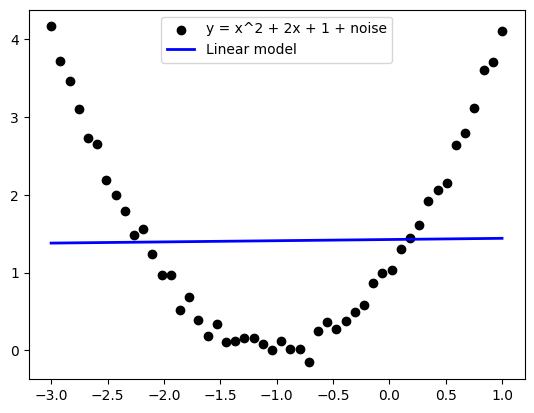

In [105]:
model_ = LinearRegression()
estimator_ = model_.fit(x_polynomial.reshape(-1, 1), y_polynomial)
y_poly_pred = estimator_.predict(x_polynomial.reshape(-1, 1))
plt.scatter(x_polynomial, y_polynomial, label='y = x^2 + 2x + 1 + noise', c='k')
plt.plot(x_polynomial, y_poly_pred, label='Linear model', c='b', lw=2)
plt.legend()

### Polynomial regression

* Polynomial features are used to fit a non-linear model to the data
* `PolynomialFeatures` transforms the input data, $x$, into a polynomial form
* In other words, it generates new features by raising the existing features to a power
* For example:

$(x) \rightarrow (1, x, x^2)$

$(x_1, x_2) \rightarrow (1, x_1, x_2, x_1^2, x_1x_2, x_2^2)$

* This is also called **kernel trick** using polynomials

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x_polynomial_reshaped = x_polynomial.reshape(-1, 1)
x_polynomial_features = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_polynomial_reshaped)

In [109]:
model_poly1 = LinearRegression(fit_intercept=True)
estimator_poly1 = model_poly1.fit(x_polynomial_features, y_polynomial)
R_squared_poly1 = estimator_poly1.score(x_polynomial_features, y_polynomial)
b_poly1 = estimator_poly1.intercept_
print('Coefficients:')
for coef in estimator_poly1.coef_:
    print(f'\t{coef:.4f}')
print(f'bias: {b_poly1:.4f}')
print(f'R-squared: {R_squared_poly1:.4f}')

Coefficients:
	2.0496
	1.0171
bias: 1.0307
R-squared: 0.9942


In [115]:
x_polynomial

array([-3.        , -2.91836735, -2.83673469, -2.75510204, -2.67346939,
       -2.59183673, -2.51020408, -2.42857143, -2.34693878, -2.26530612,
       -2.18367347, -2.10204082, -2.02040816, -1.93877551, -1.85714286,
       -1.7755102 , -1.69387755, -1.6122449 , -1.53061224, -1.44897959,
       -1.36734694, -1.28571429, -1.20408163, -1.12244898, -1.04081633,
       -0.95918367, -0.87755102, -0.79591837, -0.71428571, -0.63265306,
       -0.55102041, -0.46938776, -0.3877551 , -0.30612245, -0.2244898 ,
       -0.14285714, -0.06122449,  0.02040816,  0.10204082,  0.18367347,
        0.26530612,  0.34693878,  0.42857143,  0.51020408,  0.59183673,
        0.67346939,  0.75510204,  0.83673469,  0.91836735,  1.        ])

In [124]:
y_polynomial_pred1 = model_poly1.predict(x_polynomial_features)
## y_polynomial_pred1 = c2 * x_polynomial ** 2 + c1 * x_polynomial + b_poly1


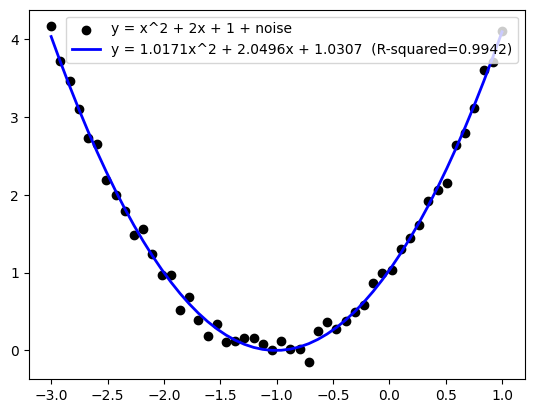

In [127]:
c1, c2 = estimator_poly1.coef_
c1, c2, b_poly1, R_squared_poly1 = np.round(c1, 4), np.round(c2, 4), np.round(b_poly1, 4), np.round(R_squared_poly1, 4)
plt.scatter(x_polynomial, y_polynomial, label='y = x^2 + 2x + 1 + noise', c='k')
plt.plot(x_polynomial, y_polynomial_pred1, label=f'y = {c2}x^2 + {c1}x + {b_poly1}  (R-squared={R_squared_poly1})', c='b', lw=2)
plt.legend()

### Predicting without using squared term in the features

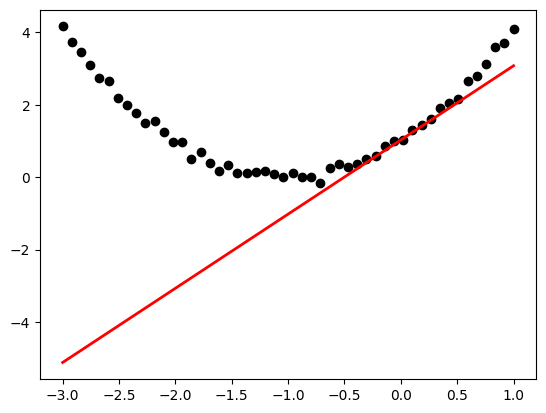

In [129]:
x_polynomial_features_simple = x_polynomial_features * [1, 0]  # Zero-out the x^2 coefficient of features
y_polynomial_pred1_simple = model_poly1.predict(x_polynomial_features_simple)

plt.scatter(x_polynomial, y_polynomial, label='y = x^2 + 2x + 1 + noise', c='k')
plt.plot(x_polynomial, y_polynomial_pred1_simple, c='r', lw=2)